# Loan Predication
## About Dataset
Among all industries, insurance domain has the largest use of analytics & data science methods. This data set would provide you enough taste of working on data sets from insurance companies, what challenges are faced, what strategies are used, which variables influence the outcome etc. This is a classification problem. The data has 615 rows and 13 columns.
Problem-----
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.
توقع قبول أو رفض طلب العملاء للحصول على القروض وفقا لمعايير البنك

# Data Analysis

In [24]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [25]:
data = pd.read_csv(r"C:\Users\dell\Desktop\Data Science & ML\Loan Predication\train_u6lujuX_CVtuZ9i (1).csv")
data. head(11)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [26]:
data.info()
print('shape of dataset :- ',data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
shape of dataset :-  (614, 13)


In [27]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


# Data Visulization

<AxesSubplot:>

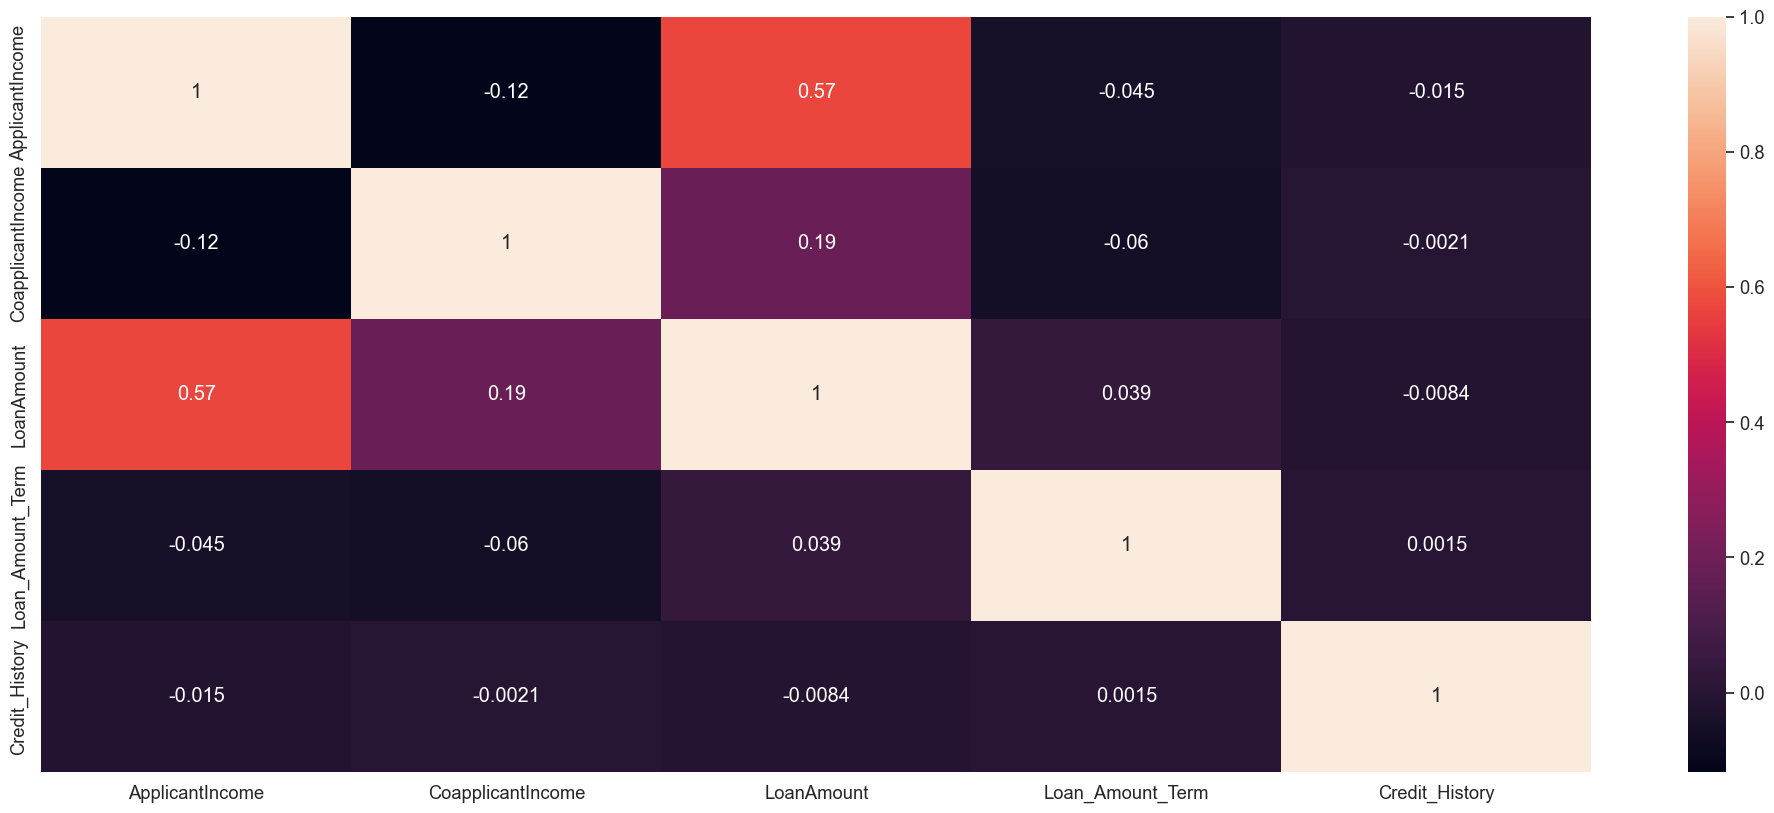

In [28]:
#Data Correlations
fig = plt.figure(dpi = 100)
sns.set(rc={'figure.figsize':[25,10]},font_scale=1.2)
sns.heatmap(data.corr(), annot = True)

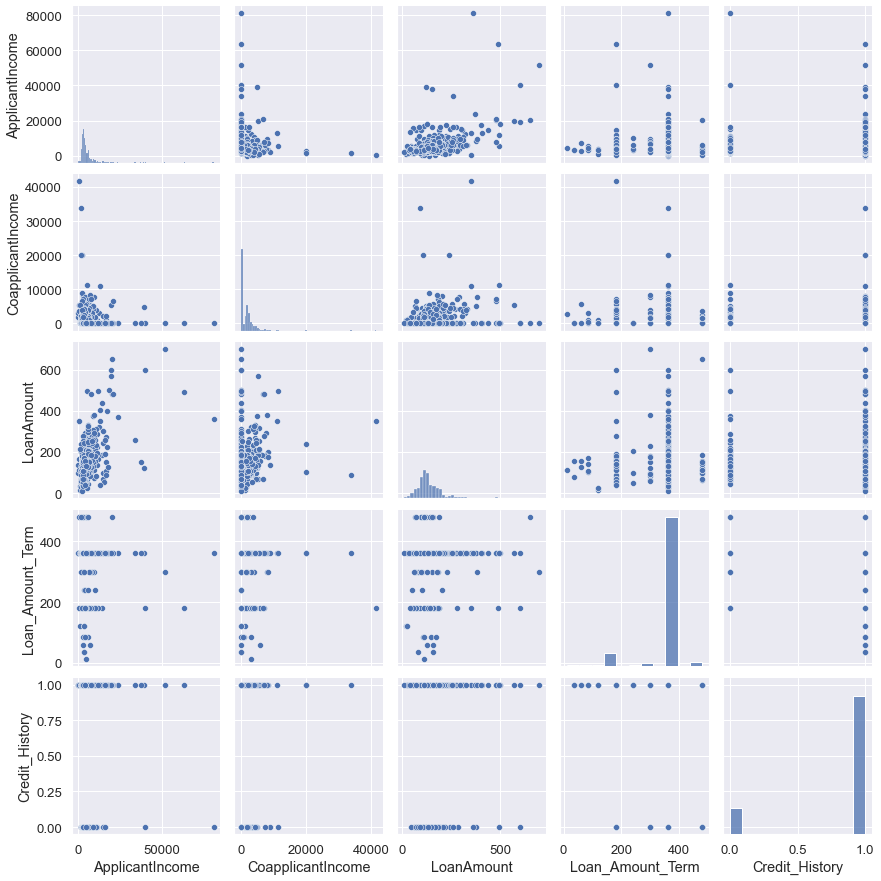

In [29]:
sns.pairplot(data)

## Numerical Values :
#### ApplicantIncome
#### CoapplicantIncome
#### LoanAmount
#### Loan_Amount_Term
#### Credit_History

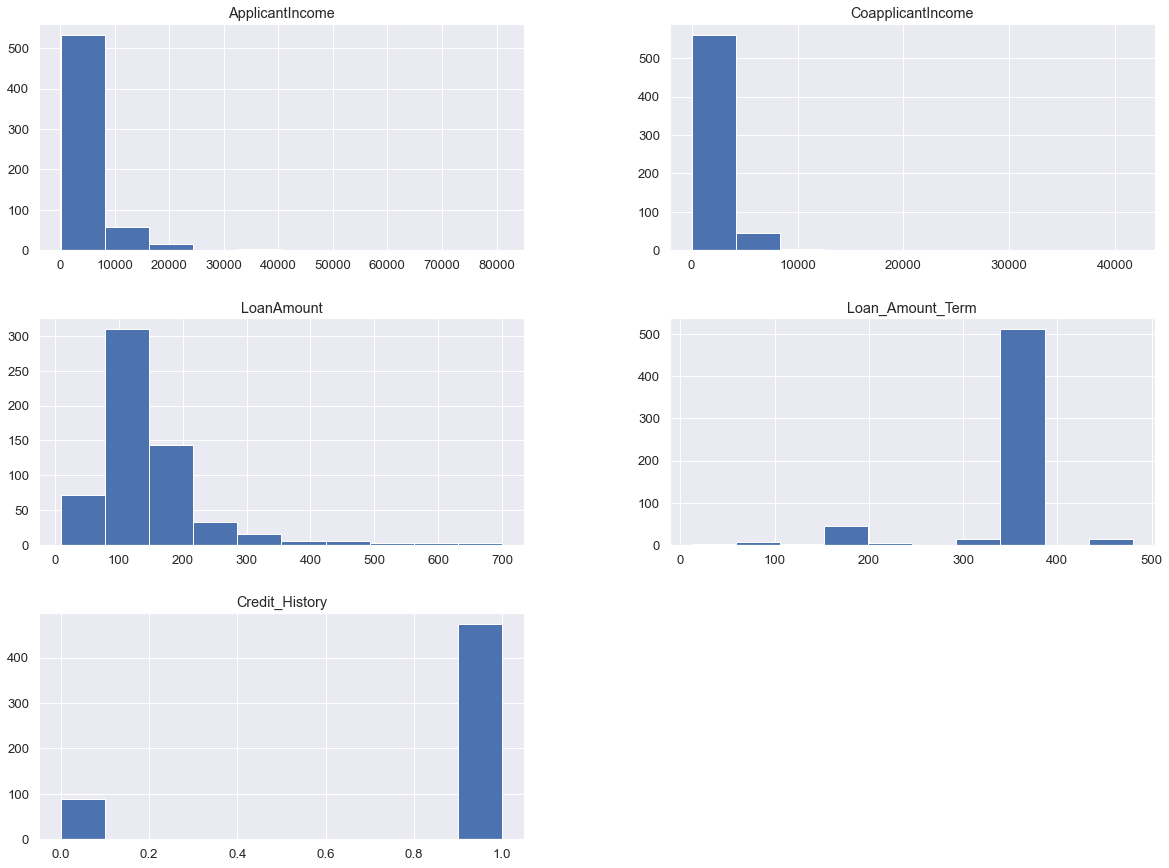

In [30]:
data.hist(figsize=(20,15))
plt.show()

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Catgrical values :
#### 1   Loan_ID             
#### 2   Gender              
#### 3   Married             
#### 4   Dependents          
#### 5   Education           
#### 6   Self_Employed 
#### 7  Property_Area      
#### 8  Loan_Status 

# Bar Charts

C:\Users\dell\AppData\Local\Temp\ipykernel_7892\3525984343.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


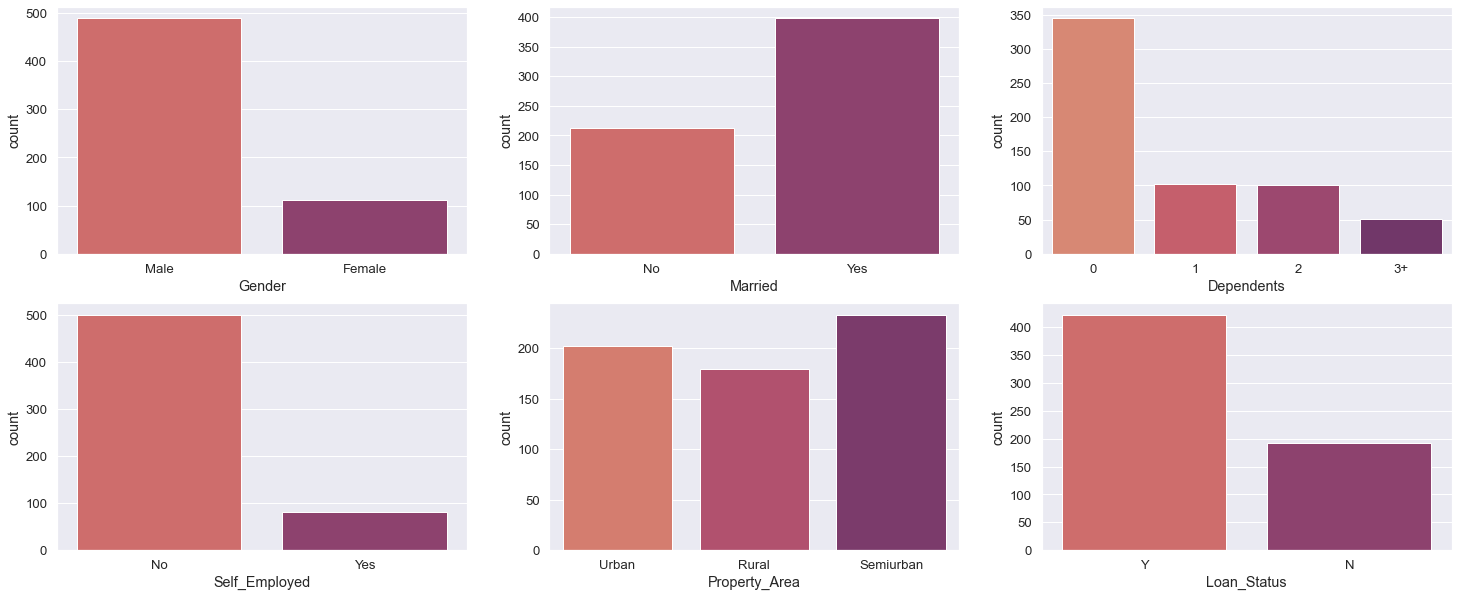

In [32]:
fig, ax = plt.subplots(2,3)
sns.countplot(x='Gender',data=data,palette='flare', ax=ax[0,0])
sns.countplot(x='Married',data=data,palette='flare', ax=ax[0,1])
sns.countplot(x='Dependents',data=data,palette='flare', ax=ax[0,2])
sns.countplot(x='Self_Employed',data=data,palette='flare', ax=ax[1,0])
sns.countplot(x='Property_Area',data=data,palette='flare', ax=ax[1,1])
sns.countplot(x='Loan_Status',data=data,palette='flare', ax=ax[1,2])
fig.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_7892\3655392610.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


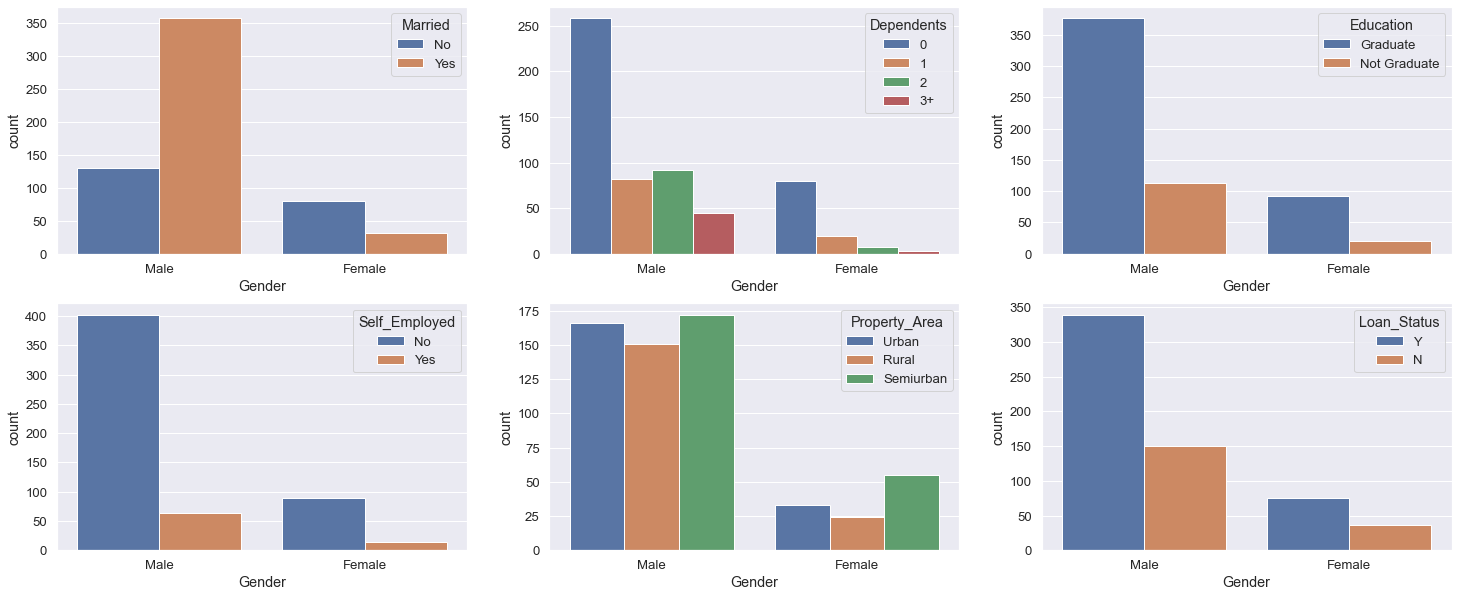

In [33]:
fig, ax = plt.subplots(2,3)
sns.countplot(x="Gender", hue="Married", data=data, ax=ax[0,0])
sns.countplot(x="Gender", hue="Dependents", data=data, ax=ax[0,1])
sns.countplot(x="Gender", hue="Education", data=data, ax=ax[0,2])
sns.countplot(x="Gender", hue="Self_Employed", data=data, ax=ax[1,0])
sns.countplot(x="Gender", hue="Property_Area", data=data, ax=ax[1,1])
sns.countplot(x="Gender", hue="Loan_Status", data=data, ax=ax[1,2])
fig.show()

# Box Plot 

C:\Users\dell\AppData\Local\Temp\ipykernel_7892\2211487211.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


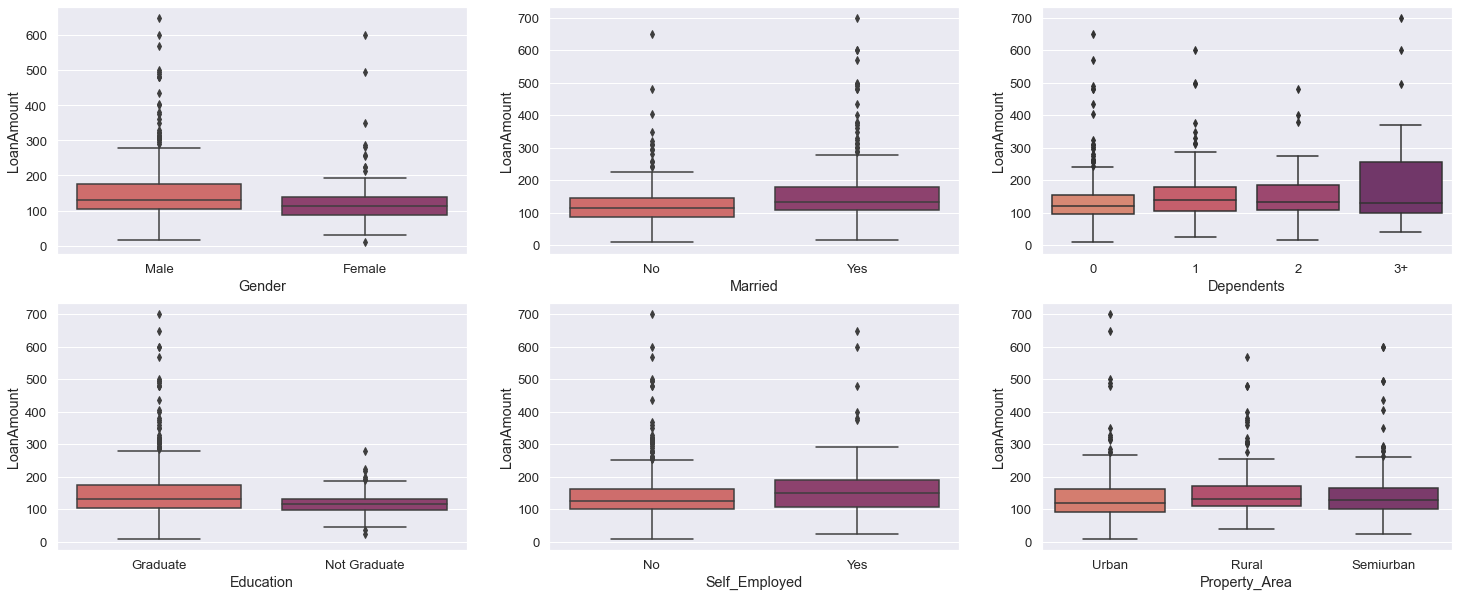

In [34]:
fig, ax = plt.subplots(2,3)
sns.boxplot(x='Gender',y='LoanAmount',data=data,palette='flare', ax=ax[0,0])
sns.boxplot(x='Married',y='LoanAmount',data=data,palette='flare', ax=ax[0,1])
sns.boxplot(x='Dependents',y='LoanAmount',data=data,palette='flare', ax=ax[0,2])
sns.boxplot(x='Education',y='LoanAmount',data=data,palette='flare', ax=ax[1,0])
sns.boxplot(x='Self_Employed',y='LoanAmount',data=data,palette='flare', ax=ax[1,1])
sns.boxplot(x='Property_Area',y='LoanAmount',data=data,palette='flare', ax=ax[1,2])
fig.show()

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

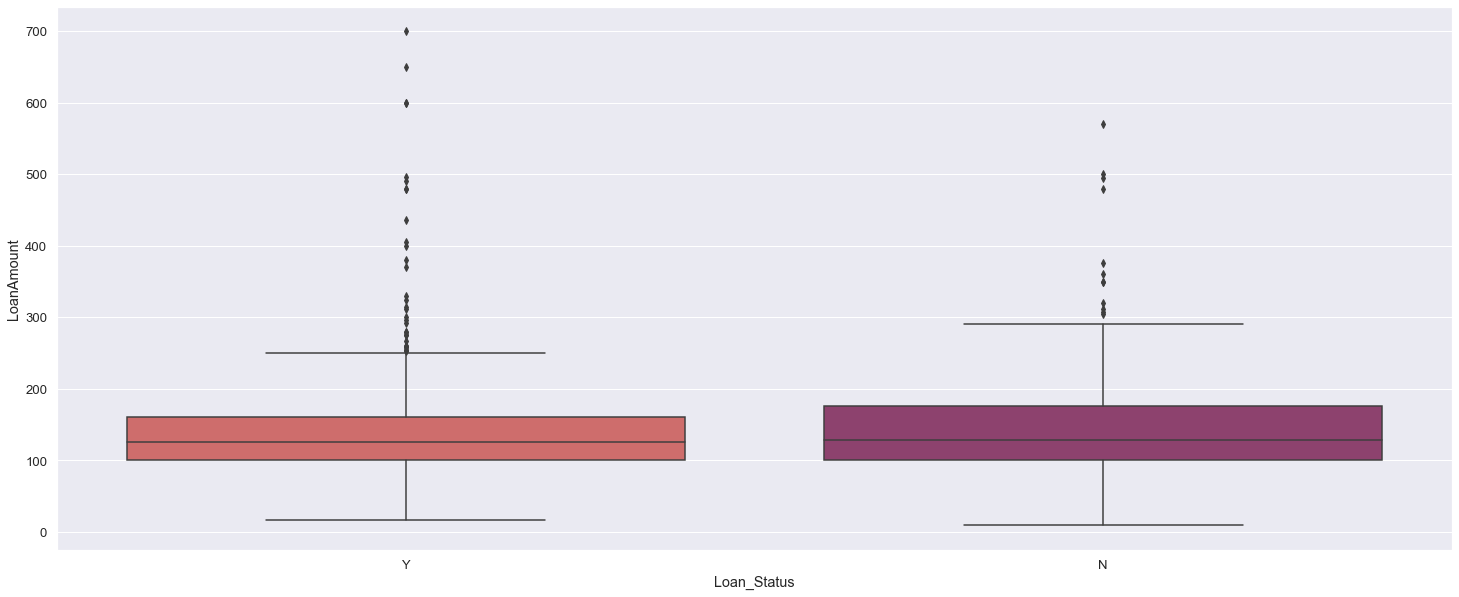

In [35]:
sns.boxplot(x='Loan_Status',y='LoanAmount',data=data,palette='flare')

# Data Cleaning

In [36]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [37]:
data=data.dropna()
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [38]:
# data.Dependents.value_counts() old 
data.replace(to_replace='3+',value='4',inplace=True)
# or: data=data.replace(to_replace='3+',value='4')
data.Dependents.value_counts() # new

C:\Users\dell\AppData\Local\Temp\ipykernel_7892\2893025508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace(to_replace='3+',value='4',inplace=True)


0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [106]:
#Transform Data
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
data.Gender=la.fit_transform(data.Gender)
data.Married=la.fit_transform(data.Married)
data.Dependents=la.fit_transform(data.Dependents)
data.Education=la.fit_transform(data.Education)
data.Self_Employed=la.fit_transform(data.Self_Employed)
data.Property_Area=la.fit_transform(data.Property_Area)
data.Loan_Status=la.fit_transform(data.Loan_Status)
data

C:\Users\dell\AppData\Local\Temp\ipykernel_7892\1108820042.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Gender=la.fit_transform(data.Gender)
C:\Users\dell\AppData\Local\Temp\ipykernel_7892\1108820042.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Married=la.fit_transform(data.Married)
C:\Users\dell\AppData\Local\Temp\ipykernel_7892\1108820042.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [ ]:
#Replace Data
#loan["Gender"].replace({'Male': 1, 'Female': 0}, inplace=True)
#loan["Married"].replace({'No': 0, 'Yes': 1}, inplace=True)
#loan["Dependents"].replace({'0': 0, '1': 1, '2': 2, '3+': 3}, inplace=True)
#loan["Education"].replace({'Graduate': 1, 'Not Graduate': 0}, inplace=True)
#loan["Self_Employed"].replace({'No': 0, 'Yes': 1}, inplace=True)
#loan["Property_Area"].replace({'Rural': 0, 'Urban': 1, "Semiurban": 2}, inplace=True)
#loan["Loan_Status"].replace({'N': 0, 'Y': 1}, inplace=True)
#loan.head()

In [ ]:
# Fill null by mode method or frequency
#loan["Gender"].fillna(value=loan['Gender'].mode()[0],inplace=True)
#loan["Married"].fillna(value=loan['Married'].mode()[0],inplace=True)
#loan["Dependents"].fillna(value=loan['Dependents'].mode()[0],inplace=True)
#loan["Self_Employed"].fillna(value=loan['Self_Employed'].mode()[0],inplace=True)
#loan["LoanAmount"].fillna(value=loan['LoanAmount'].mode()[0],inplace=True)
#loan["Loan_Amount_Term"].fillna(value=loan['Loan_Amount_Term'].mode()[0],inplace=True)
#loan["Credit_History"].fillna(value=loan['Credit_History'].mode()[0],inplace=True)

# Machine Learing

In [40]:
#create the Model 
x=data.drop(['Loan_Status','Loan_ID'],axis=1)
y=data.Loan_Status

In [72]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.1, random_state=40,shuffle=True)
print(x.shape,X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


In [81]:
model = svm.SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

In [99]:
from sklearn import svm, metrics
y_pred=model.predict(X_test)
print("Accuracy on testing data: ", metrics.accuracy_score(y_test, y_pred))
print("Precision on testing data:", metrics.precision_score(y_test, y_pred))
print("Recall on testing data: ", metrics.recall_score(y_test, y_pred))

Accuracy on testing data:  0.8333333333333334
Precision on testing data: 0.8372093023255814
Recall on testing data:  0.972972972972973


In [107]:
#Culculated by manually
calc_accuracy = (TP+TN)/(TP+TN+FP+FN)
calc_precision = (TP)/(TP+FP)
calc_recall = (TP)/(TP+FN)
print("Calculated accuracy = ", calc_accuracy)
print("Calculated precision = ", calc_precision)
print("Calculated recall = ", calc_recall)

Calculated accuracy =  0.8333333333333334
Calculated precision =  0.8372093023255814
Calculated recall =  0.972972972972973


TN=4, FP=7, FN=1, TP=36
[[ 4  1]
 [ 7 36]]
              precision    recall  f1-score   support

           0       0.36      0.80      0.50         5
           1       0.97      0.84      0.90        43

    accuracy                           0.83        48
   macro avg       0.67      0.82      0.70        48
weighted avg       0.91      0.83      0.86        48



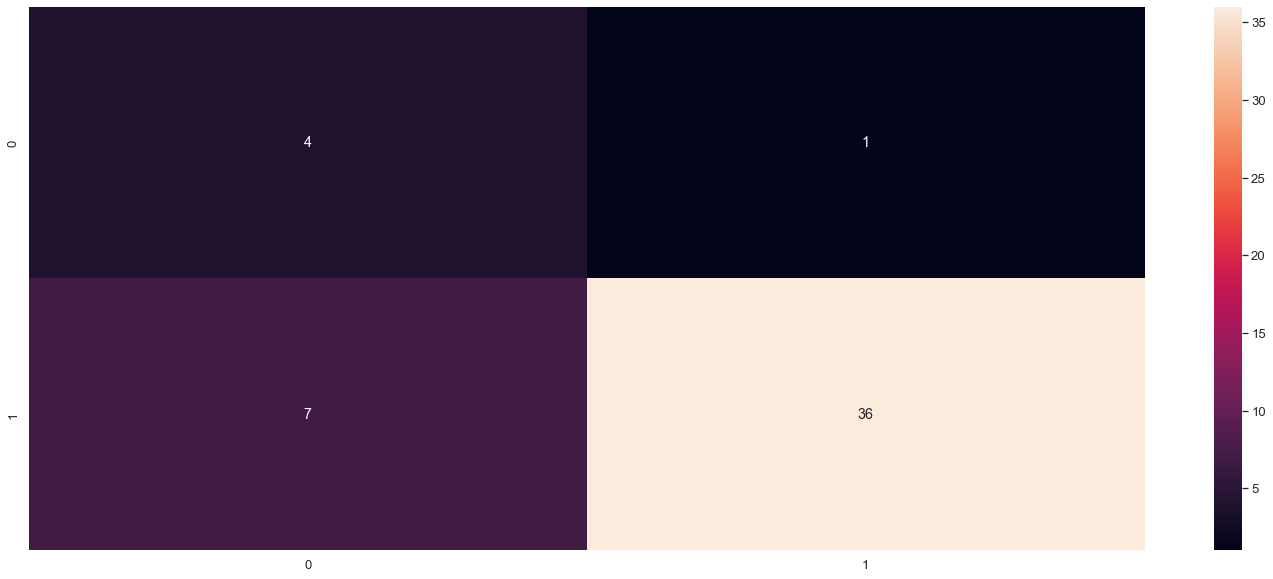

In [103]:
cm = metrics.confusion_matrix(y_test, test_predict)
TN, FP, FN, TP = cm.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP,FN, TP))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt='.0f')
plt.show()